In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pycountry_convert as pc
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Display data

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Find dataframe size

df.shape

(7787, 12)

In [4]:
# Null values analysis

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

director's null rate : 30.679337357133683%
cast's null rate : 9.220495697958135%
country's null rate : 6.51085141903172%
date_added's null rate : 0.1284191601386927%
rating's null rate : 0.08989341209708489%


In [5]:
# Basic data description

df.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.0,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s4972,Movie,Girl,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3


In [6]:
# Data cleaning

df.dropna(subset=['country'], inplace=True)
df = df.fillna('NULL')
df['year_added'] = df['date_added'].apply(lambda x :  x.split(',')[-1])
df['year_added'] = df['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
df['year_added'] = df['year_added'].apply(int)

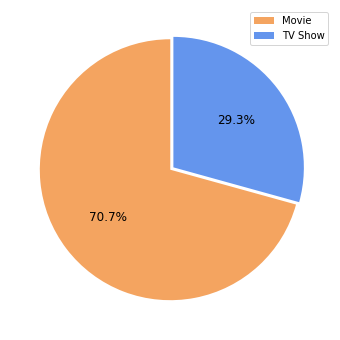

In [7]:
# Growth of content

content_type = df.groupby('type').count()
content_type.reset_index(inplace=True)
content_type = content_type[['type', 'title']]
content_type.columns = ['type', 'count']

fig2, ax2 = plt.subplots(figsize=(25, 6))
colors = ['sandybrown', 'cornflowerblue']
ax2.pie(x=content_type['count'], startangle=90, explode=(0, 0.03), colors=colors, autopct='%1.1f%%', textprops={'fontsize': 12})
ax2.legend(labels=content_type['type'], loc='upper right')

plt.show()

In [8]:
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]


tv_show_count = tv_show['year_added'].value_counts().reset_index()
tv_show_count = tv_show_count.rename(columns={'index': 'year_added', 'year_added': 'count'})
tv_show_count = tv_show_count.sort_values('year_added')

movie_count = movie['year_added'].value_counts().reset_index()
movie_count = movie_count.rename(columns= {'index': 'year_added', 'year_added': 'count'})
movie_count = movie_count.sort_values('year_added')

trace1 = go.Scatter(x=tv_show_count['year_added'], y=tv_show_count['count'], name="TV Shows")
trace2 = go.Scatter(x=movie_count['year_added'], y=movie_count["count"], name="Movies")
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",xaxis_title='Year',yaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [9]:
# Growth of genre

movie = df[df['type'] == 'Movie']
tv_show = df[df['type'] == 'TV Show']

def growth(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()


There are 20 types in the Netflix Movie Dataset


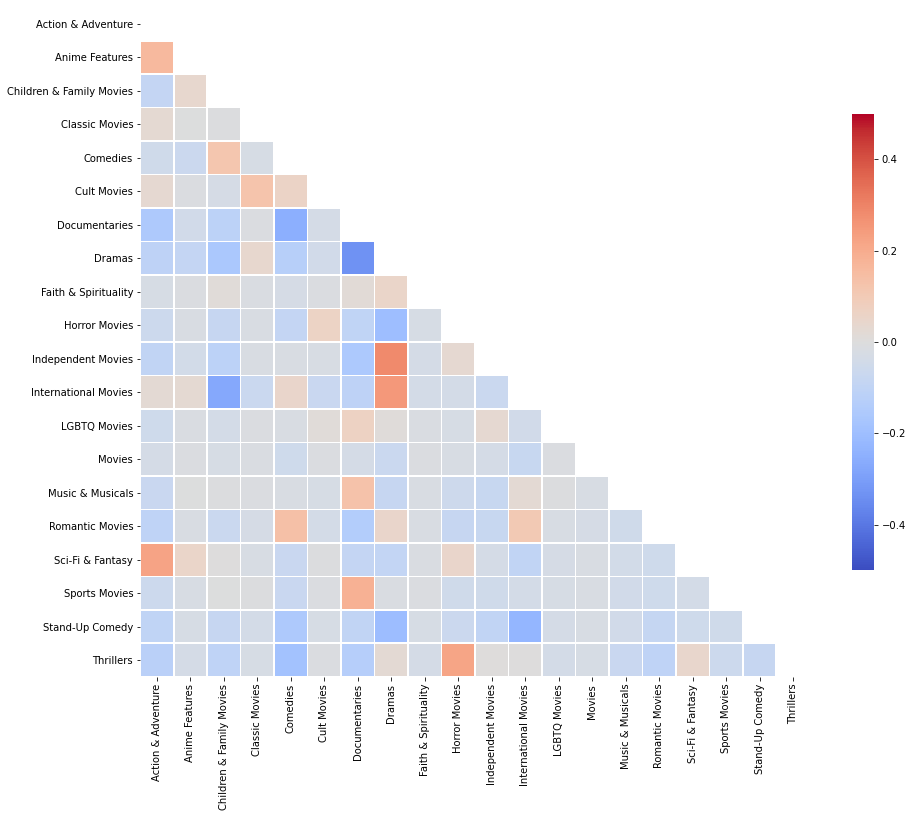

In [10]:
growth(movie, 'Movie')

There are 22 types in the Netflix TV Show Dataset


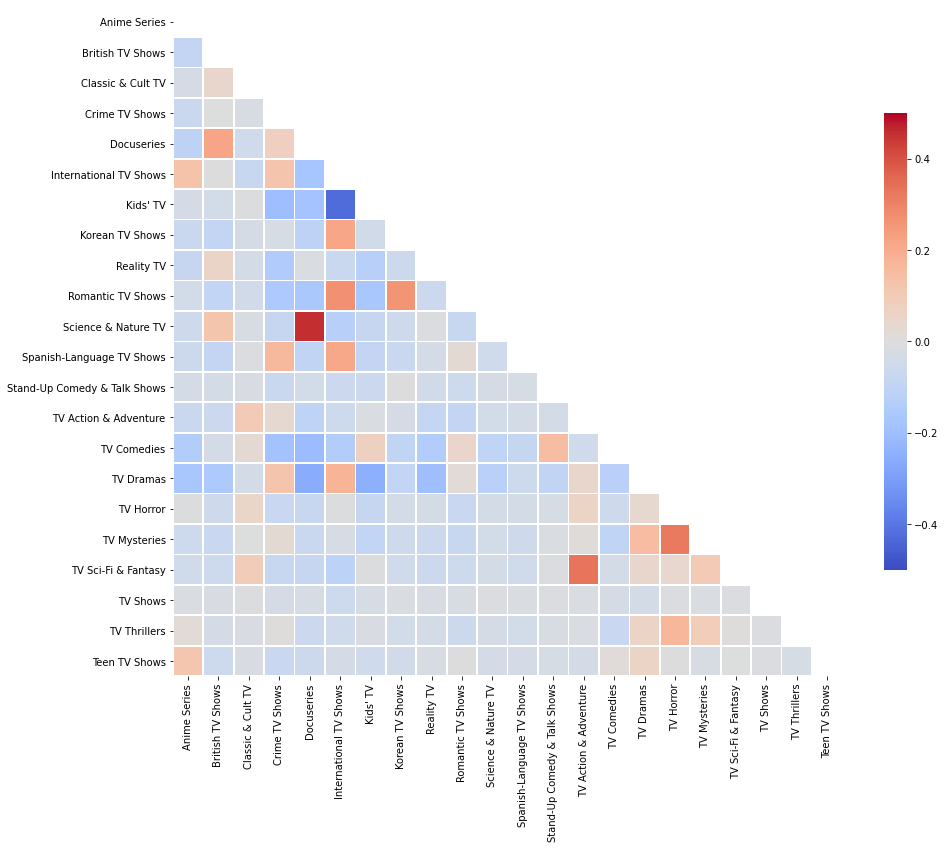

In [11]:
growth(tv_show, 'TV Show')

([<matplotlib.axis.XTick at 0x19907d3d1c0>,
 <a list of 13 Text major ticklabel objects>)

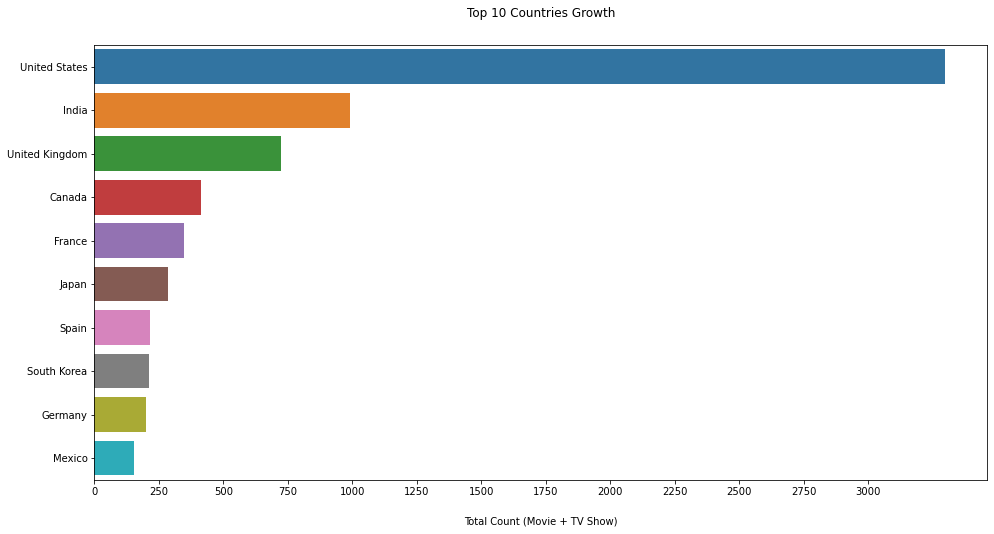

In [12]:
# Growth of countries

country_true_count=pd.Series(df.country.str.split(', ').sum()).value_counts()

# Taking top 10
plt.rcParams['figure.figsize'] = (16,8)
countries = country_true_count.head(10).index
Content_count = country_true_count.head(10).values
sns.barplot(y=countries,x=Content_count)
plt.title("Top 10 Countries Growth",y=1.05)
plt.xlabel('Total Count (Movie + TV Show)',labelpad=20)
plt.xticks(range(0,3250,250))

In [13]:
# Growth of continents

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        value = 'Null'
        continent_values.append(value)

continent_values = []
for country in df['country']:
    c = country.split(",", 1)
    try:
        value = country_to_continent(c[0])
        continent_values.append(value)
    except:
        value = country_to_continent(c)
        continent_values.append(value)

([<matplotlib.axis.XTick at 0x19907bb9040>,
 <a list of 13 Text major ticklabel objects>)

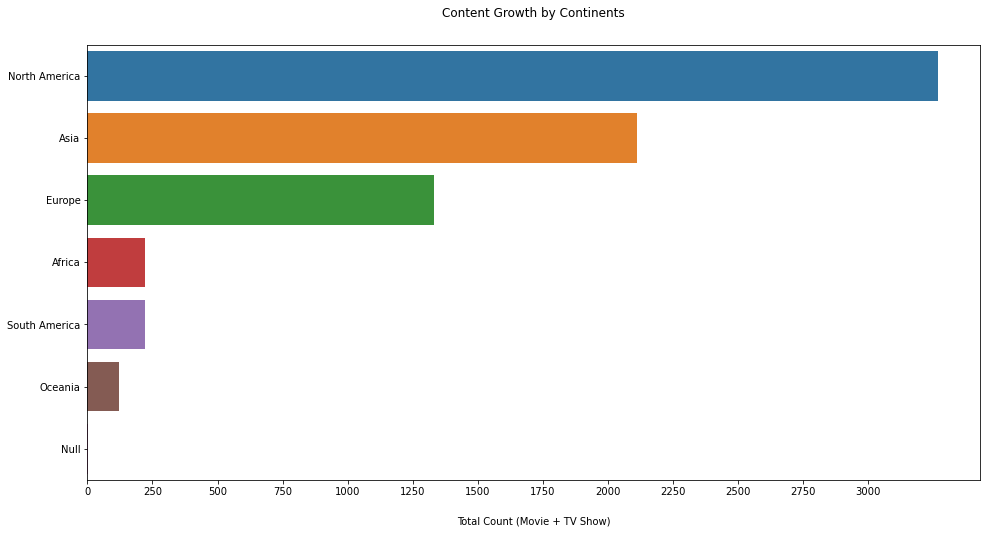

In [14]:
df_continent = pd.DataFrame(continent_values,columns=['continent'])
continent_count=pd.Series(df_continent.continent.value_counts())

plt.rcParams['figure.figsize'] = (16,8)
continents = continent_count.head(8).index
Content_count = continent_count.head(8).values
sns.barplot(y=continents,x=Content_count)
plt.title("Content Growth by Continents",y=1.05)
plt.xlabel('Total Count (Movie + TV Show)',labelpad=20)
plt.xticks(range(0,3250,250))

In [15]:
# What are consumers watching the most ?

col = "listed_in"
categories = ", ".join(movie['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Genre of Movies consumers are watching most",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [16]:
col = "listed_in"
categories = ", ".join(tv_show['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Genre of TV shows consumers are watching most",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [17]:
# What's popular in which country ?

# USA
usa = movie[movie['country'] == 'United States'] 
col = "listed_in"
categories = ", ".join(usa['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="What is popular in movies in USA",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

usa_tv = tv_show[tv_show['country'] == 'United States'] 
col = "listed_in"
categories = ", ".join(usa_tv['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="What is popular in tv shows in USA",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [18]:
# Length of shows and movies

movie['duration'] = movie['duration'].str.replace(' min','')
movie['duration'] = movie['duration'].astype(str).astype(int)
movie['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7780     94
7781     88
7782     99
7783    111
7786     90
Name: duration, Length: 5147, dtype: int32

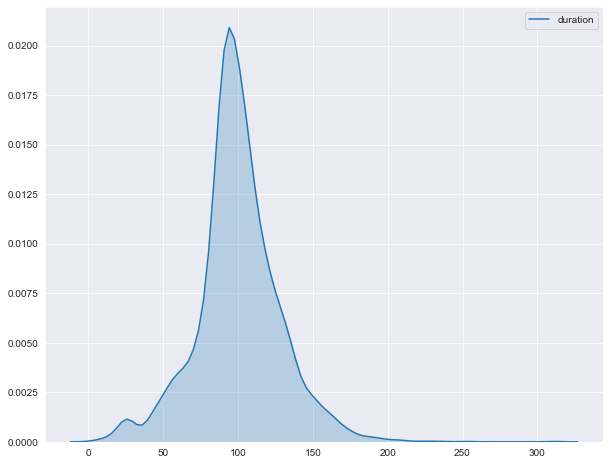

In [19]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.kdeplot(data = movie["duration"], shade=True)

Text(0.5, 1.0, 'Duration Analysis')

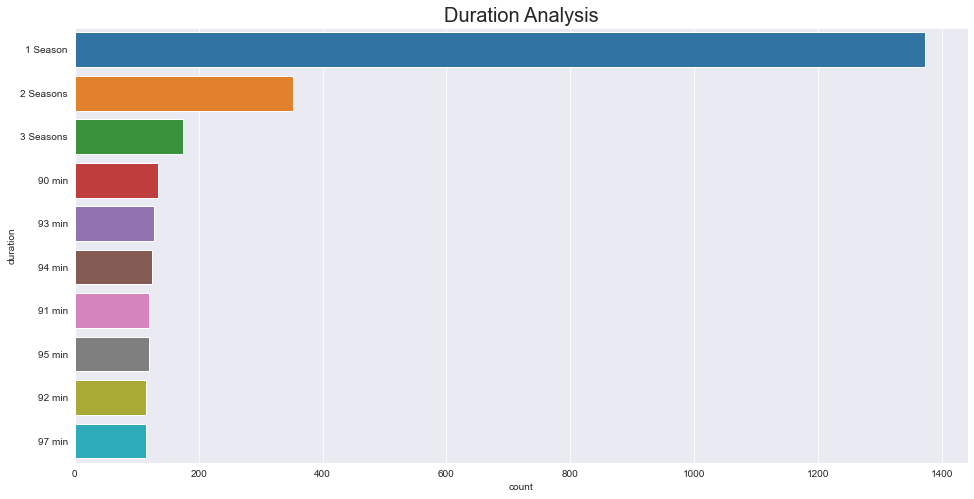

In [20]:
plt.rcParams['figure.figsize'] = (16,8)
sns.countplot(y = 'duration', data = df, order = df['duration'].value_counts()[:10].index)
plt.title('Duration Analysis',fontsize = 20)

In [21]:
# Popular genres in countries

# USA
usa = movie[movie['country'] == 'United States'] 
col = "listed_in"
categories = ", ".join(usa['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Popular movies genres in USA",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

usa_tv = tv_show[tv_show['country'] == 'United States'] 
col = "listed_in"
categories = ", ".join(usa_tv['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Popular tv shows genres in USA",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [22]:
# UK

uk = movie[movie['country'] == 'United Kingdom'] 
col = "listed_in"
categories = ", ".join(uk['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Popular movies genres in UK",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

uk_tv = tv_show[tv_show['country'] == 'United Kingdom'] 
col = "listed_in"
categories = ", ".join(uk_tv['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Popular tv shows genres in UK",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [23]:
# Japan

jp = movie[movie['country'] == 'Japan'] 
col = "listed_in"
categories = ", ".join(jp['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Popular movies genres in Japan",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

jp_tv = tv_show[tv_show['country'] == 'Japan'] 
col = "listed_in"
categories = ", ".join(jp_tv['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Popular tv shows genres in Japan",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

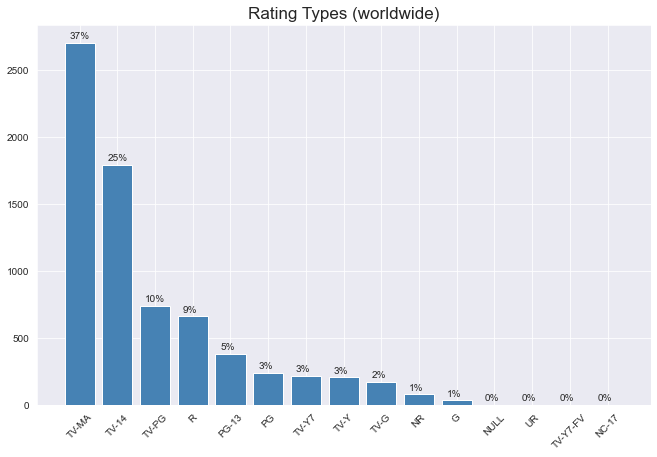

In [24]:
# Ratings

df['rating'].value_counts()

rating_type = df['rating'].value_counts().reset_index()

x_rating_type = rating_type['index']
y_rating_type = rating_type['rating']

fig4, ax4 = plt.subplots(figsize=(11,7))
ax4.tick_params(axis = 'x', rotation = 45)
ax4.bar(x = x_rating_type, height = y_rating_type, color = 'steelblue')
ax4.set_title('Rating Types (worldwide)', fontsize = 17)

for a,b in zip(x_rating_type, y_rating_type): 
    plt.annotate('{:.0f}%'.format(round(int(b)/y_rating_type.sum()*100,0)),
                 xy=(a,b), xytext=(-10,4), textcoords='offset points')


plt.show()

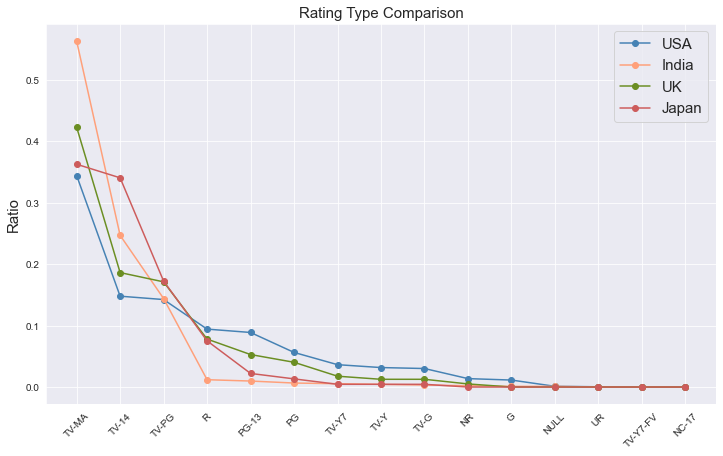

In [25]:
usa = df[df['country'] == 'United States'] 
uk = df[df['country'] == 'United Kingdom'] 
japan = df[df['country'] == 'Japan'] 
india = df[df['country'] == 'India']

rating_type_usa = usa['rating'].value_counts().reset_index()
rating_type_uk = uk['rating'].value_counts().reset_index()
rating_type_japan = japan['rating'].value_counts().reset_index()
rating_type_india = india['rating'].value_counts().reset_index()


for x in rating_type['index']:
    if not rating_type_usa['index'].str.match(x).any():
        rating_type_usa = rating_type_usa.append({'index': x, 'rating': 0}, ignore_index = True)

for x in rating_type['index']:
    if not rating_type_uk['index'].str.match(x).any():
        rating_type_uk = rating_type_uk.append({'index': x, 'rating': 0}, ignore_index = True)
        
for x in rating_type['index']:
    if not rating_type_japan['index'].str.match(x).any():
        rating_type_japan = rating_type_japan.append({'index': x, 'rating': 0}, ignore_index = True)
        
for x in rating_type['index']:
    if not rating_type_india['index'].str.match(x).any():
        rating_type_india = rating_type_india.append({'index': x, 'rating': 0}, ignore_index = True)

fig5, ax5 = plt.subplots(figsize=(12,7))
ax5.tick_params(axis='x', rotation=45)

y_rating_type_usa = rating_type_usa['rating']/rating_type_usa['rating'].sum()
y_rating_type_india = rating_type_india['rating']/rating_type_india['rating'].sum()
y_rating_type_uk = rating_type_uk['rating']/rating_type_uk['rating'].sum()
y_rating_type_japan = rating_type_japan['rating']/rating_type_japan['rating'].sum()

ax5.plot(x_rating_type, y_rating_type_usa, 'o-', color='steelblue', label='USA')
ax5.plot(x_rating_type, y_rating_type_india, 'o-', color='lightsalmon', label='India')
ax5.plot(x_rating_type, y_rating_type_uk, 'o-', color='olivedrab', label='UK')
ax5.plot(x_rating_type, y_rating_type_japan, 'o-', color='indianred', label='Japan')

ax5.set_title('Rating Type Comparison', fontsize=15)
ax5.set_ylabel('Ratio', fontsize=15)
ax5.legend(loc='upper right', prop={'size': 15})

plt.show()

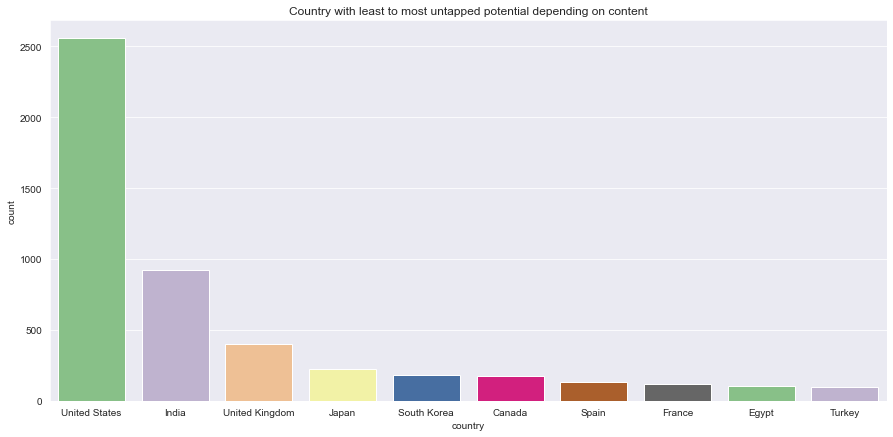

In [26]:
# Countries with most untapped potential

plt.figure(1, figsize=(15, 7))
plt.title("Country with least to most untapped potential depending on content")
sns.countplot(x = "country", order=df['country'].value_counts().index[0:10] ,data=df,palette='Accent')